In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
%matplotlib inline

In [62]:
from keras import models, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [63]:
train_data = tf.keras.datasets.cifar100.load_data()[0][0]
train_data = (train_data.astype(np.float32)-127.5)/127.5
train_data.shape

(50000, 32, 32, 3)

In [64]:
optim = keras.optimizers.Adam(learning_rate = 0.0002, beta_1=0.5)
def MakeDiscriminator():
  madel = models.Sequential([
      layers.Conv2D(64, 3, padding = 'same', input_shape = (32,32,3)),
      layers.LeakyReLU(alpha = 0.2),
      layers.Conv2D(128, 3, padding = 'same', strides = (2,2)),
      layers.LeakyReLU(alpha = 0.2),
      layers.Conv2D(256, 3, padding = 'same', strides = (2,2)),
      layers.LeakyReLU(alpha = 0.2),
      layers.Flatten(),
      layers.Dropout(0.4),
      layers.Dense(units = 1, activation = 'sigmoid')
  ])
  madel.compile(loss = 'binary_crossentropy', optimizer = optim)
  return madel

In [65]:
def MakeGenerator():
  madel = models.Sequential([
      layers.Dense(units = 4*4*256, input_dim = 256),
      layers.LeakyReLU(alpha = 0.2),
      layers.Reshape((4,4,256)),
      layers.Conv2DTranspose(128,(4,4), strides = (2,2), padding = 'same'),
      layers.LeakyReLU(alpha = 0.2),
      layers.Conv2DTranspose(128,(4,4), strides = (2,2), padding = 'same'),
      layers.LeakyReLU(alpha = 0.2),
      layers.Conv2DTranspose(128,(4,4), strides = (2,2), padding = 'same'),
      layers.LeakyReLU(alpha = 0.2),
      layers.Conv2D(3,(3,3), activation = 'tanh', padding = 'same')
  ])
  madel.compile(loss = 'binary_crossentropy', optimizer = optim)
  return madel

In [66]:
discriminator = MakeDiscriminator()
generator = MakeGenerator()
discriminator.trainable = False
madel = models.Sequential([generator, discriminator])
madel.compile(loss = 'binary_crossentropy', optimizer = optim)

In [67]:
def GeneratePict(generator):
  noize = np.random.normal(0,1 ,size = [10,256])
  randpict = generator.predict(noize)
  randpict = (randpict+1)/2
  plt.figure(figsize = (32, 32))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(randpict[i])
    plt.axis('off')
  plt.show()


1/1 [==============================] - 0s 96ms/step


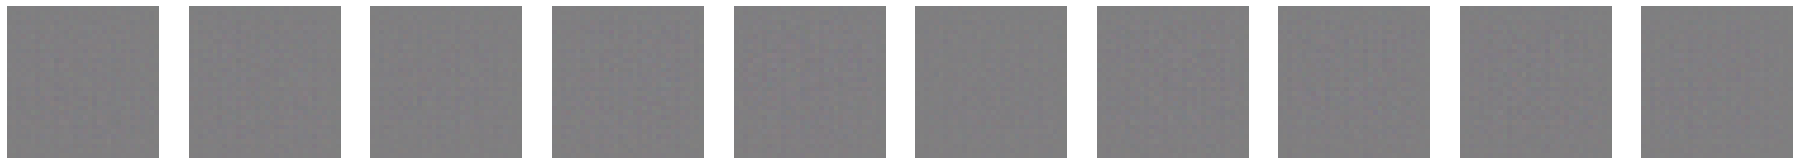

In [68]:
GeneratePict(generator)

In [70]:
def Training(epochs, batch_size):
  num_batches = int(train_data.shape[0]/batch_size)
  for e in range(epochs+1):
    for i in range(num_batches):
      noize = np.random.normal(0,1 ,size = [batch_size,256])
      image_batch = train_data[np.random.randint(0,train_data.shape[0], size = batch_size)]
      fakepict = generator.predict(noize, verbose = 0)
      xdis = np.concatenate([image_batch,fakepict])
      ydis = np.zeros(2*batch_size)
      ydis[:batch_size] = 0.9
      discriminator.trainable = True
      discriminator.train_on_batch(xdis, ydis)
      discriminator.trainable = False
      noizex = np.random.normal(0,1 ,size = [batch_size,256])
      y = np.ones(batch_size)
      madel.train_on_batch(noizex, y)
    print(e)
    if e%10 == 0:
      GeneratePict(generator)



0
1/1 [==============================] - 0s 15ms/step


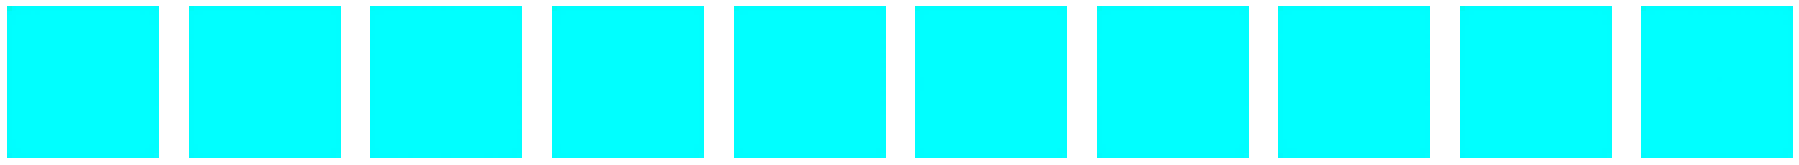

1
2
3
4
5
6
7
8
9
10
1/1 [==============================] - 0s 16ms/step


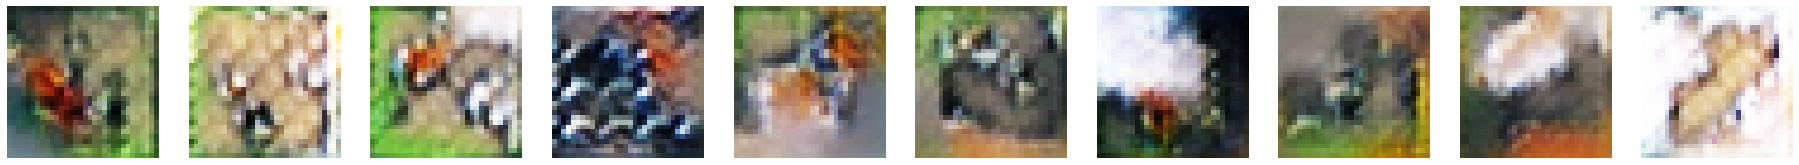

11
12
13
14
15
16
17
18
19
20
1/1 [==============================] - 0s 19ms/step


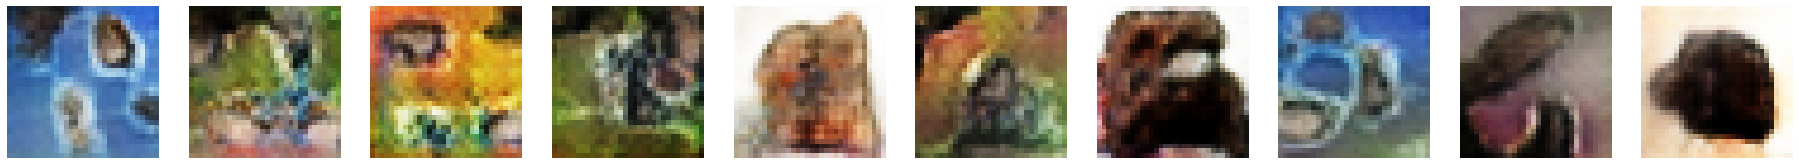

21
22
23
24
25
26
27
28
29
30
1/1 [==============================] - 0s 19ms/step


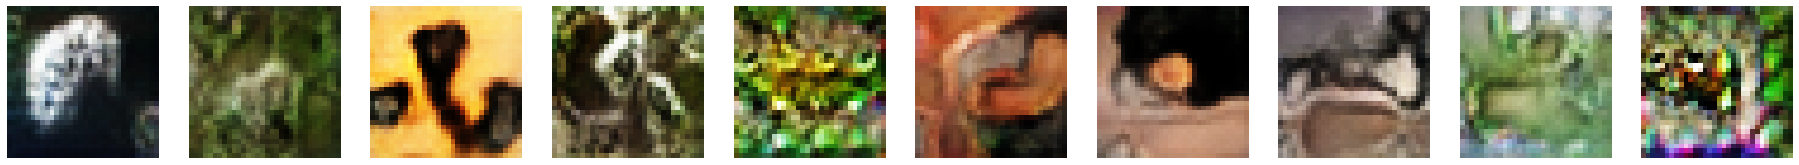

31
32
33
34
35
36
37
38
39
40
1/1 [==============================] - 0s 15ms/step


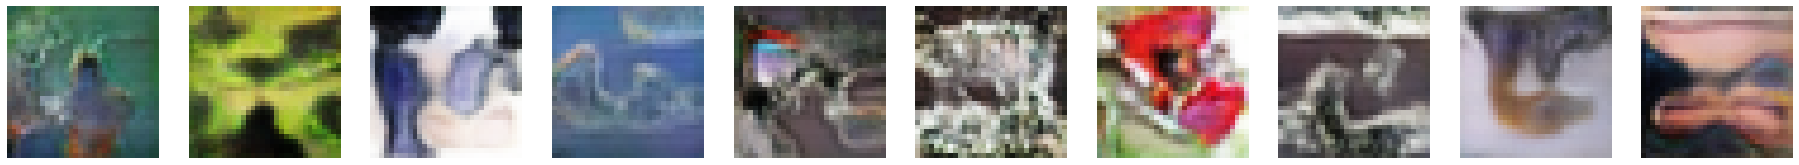

41
42
43
44
45
46
47
48
49
50
1/1 [==============================] - 0s 15ms/step


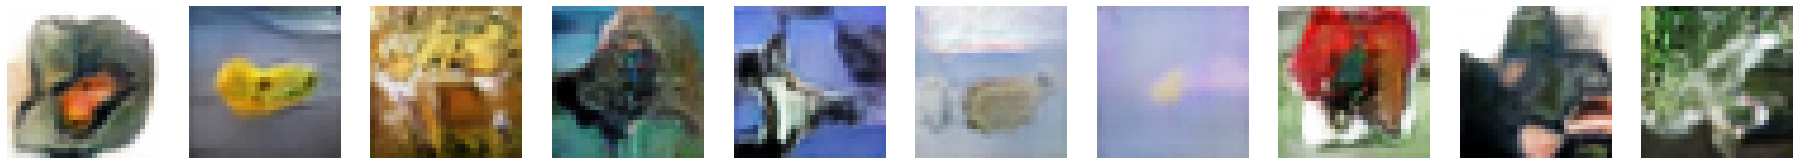

51
52
53
54
55
56
57
58
59
60
1/1 [==============================] - 0s 16ms/step


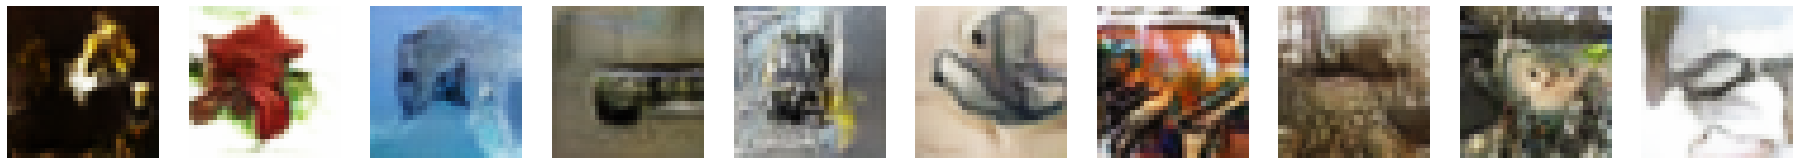

61
62
63
64


In [71]:
Training(64, 128)

1/1 [==============================] - 0s 18ms/step


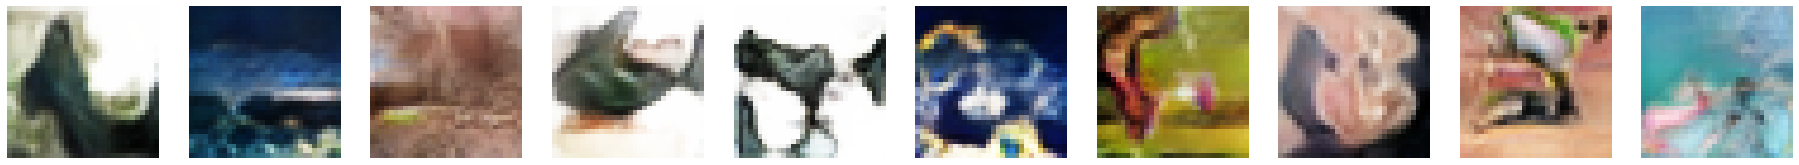

In [72]:
GeneratePict(generator)